In [49]:
import pyodbc
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import style
style.use('fivethirtyeight')

In [50]:
# Connect to the Database
cnxn = pyodbc.connect("Driver={SQL Server Native Client 11.0};"
                        "Server=wd02;"
                        "Database=FootPrint;"
                        "Trusted_Connection=yes;")

# Query

In [51]:
df = pd.read_sql_query("SELECT CONVERT(varchar,t.completedDateTime,100) Date, w.name warehouse, p.name project, oc.name operationCode, t.employee\
    FROM datex_footprint.Tasks t\
    JOIN datex_footprint.OperationCodes oc\
        ON oc.id = t.operationCodeId\
    JOIN datex_footprint.Warehouses w\
        ON w.id = t.warehouseId\
    JOIN datex_footprint.Projects p\
        ON p.id = t.projectId\
    WHERE (cast(t.completedDateTime as Date) = cast(getdate() as Date)) AND (t.employee != 'FootPrintService') AND (t.employee != 'Foot Print Service')\
    ORDER BY completedDateTime DESC", cnxn)

In [52]:
# Adding Hours
df['Hour'] = pd.to_datetime(df['Date']).dt.hour
df

,Date,warehouse,project,operationCode,employee,Hour
0,Mar 23 2022 7:10PM,10,Amatheon Pharmaceuticals,Picking,Nelson Hurtado,19
1,Mar 23 2022 7:08PM,10,TherapeuticsMD Sample,Picking,Edilberto Souza,19
2,Mar 23 2022 7:07PM,10,TherapeuticsMD Sample,Picking,Edilberto Souza,19
3,Mar 23 2022 7:04PM,10,TherapeuticsMD Sample,Picking,Edilberto Souza,19
4,Mar 23 2022 7:02PM,10,TherapeuticsMD Sample,Picking,Edilberto Souza,19
...,...,...,...,...,...,...
4869,Mar 23 2022 6:46AM,20,Sartorius Stedim North America,Picking,Ernest Ferguson,6
4870,Mar 23 2022 6:46AM,20,Sartorius Stedim North America,Picking,Ernest Ferguson,6
4871,Mar 23 2022 6:46AM,20,Sartorius Stedim North America,Picking,Ernest Ferguson,6
4872,Mar 23 2022 6:44AM,20,Sartorius Stedim North America,Picking,Ernest Ferguson,6


### Warehouse Activity

In [53]:
df_warehouse = df.groupby(['warehouse']).count()[['operationCode']]
df_warehouse.reset_index(inplace=True)
df_warehouse

,warehouse,operationCode
0,10,1527
1,102,11
2,12,53
3,15,643
4,16,188
5,17,269
6,18,259
7,19,547
8,20,886
9,21,387


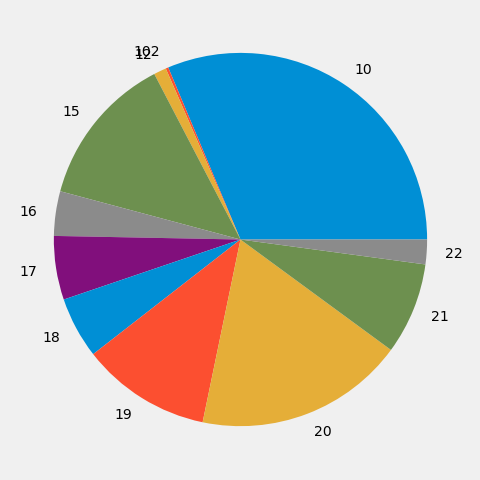

In [54]:
warehouse = df_warehouse['warehouse']
activity = df_warehouse['operationCode']

plt.subplots(figsize=(8,8))
plt.pie(activity, labels=warehouse)
plt.show()

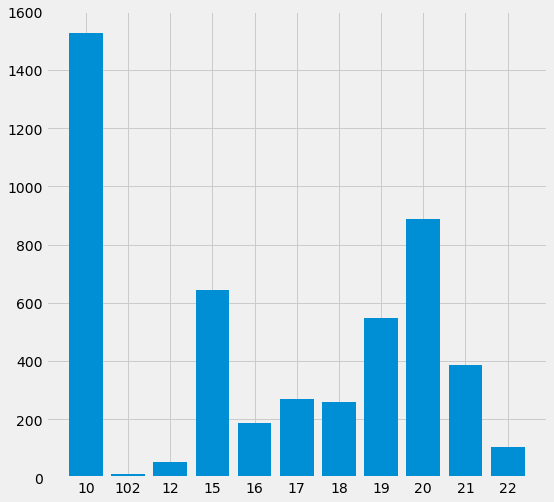

In [55]:
warehouse = df_warehouse['warehouse']
activity = df_warehouse['operationCode']

plt.subplots(figsize=(8,8))
plt.bar(warehouse, activity)
plt.show()

In [56]:
# Save Data in JSON format
df_warehouse_index = df_warehouse.set_index(['warehouse'])
df_warehouse_index.to_json('data/warehouse.json')
df_warehouse_index

,operationCode
warehouse,
10,1527
102,11
12,53
15,643
16,188
17,269
18,259
19,547
20,886


### Operations type

In [57]:
df_operation = df.groupby(['operationCode']).count()[['project']]
df_operation.reset_index(inplace=True)
df_operation

,operationCode,project
0,Batch Move,246
1,Count,105
2,Create Inventory,14
3,DONE RECEIVING,42
4,DRIVER CHECK IN,65
5,Finished Receiving,15
6,Inventory Adjustment,42
7,Lot Status Change,120
8,Manual Batch Allocation,6
9,Manual Pick Allocation,316


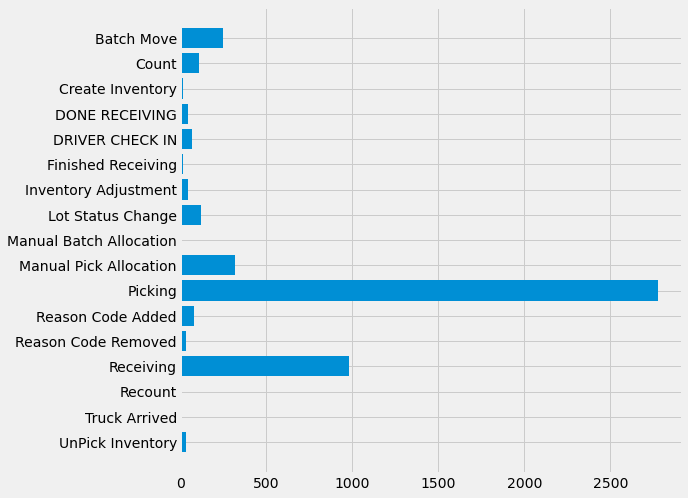

In [58]:
values = df_operation['project']
operation = df_operation['operationCode']

plt.subplots(figsize=(8,8))
plt.barh(operation, values)
plt.gca().invert_yaxis()
plt.show()

In [59]:
df_operation.rename(columns={"project": "Tasks"})
df_operation

,operationCode,project
0,Batch Move,246
1,Count,105
2,Create Inventory,14
3,DONE RECEIVING,42
4,DRIVER CHECK IN,65
5,Finished Receiving,15
6,Inventory Adjustment,42
7,Lot Status Change,120
8,Manual Batch Allocation,6
9,Manual Pick Allocation,316


In [60]:
# Save Data in JSON format
df_operation = df_operation.rename(columns={"project": "Tasks"})
df_operation_index = df_operation.set_index(['operationCode'])
df_operation_index.to_json('data/operations_type.json')
df_operation_index

,Tasks
operationCode,
Batch Move,246
Count,105
Create Inventory,14
DONE RECEIVING,42
DRIVER CHECK IN,65
Finished Receiving,15
Inventory Adjustment,42
Lot Status Change,120
Manual Batch Allocation,6


### Operations per Hour

In [61]:
df_hours = df.groupby(['Hour']).count()[['operationCode']]
df_hours.reset_index(inplace=True)
df_hours

,Hour,operationCode
0,6,9
1,7,79
2,8,277
3,9,572
4,10,633
5,11,612
6,12,445
7,13,380
8,14,378
9,15,413


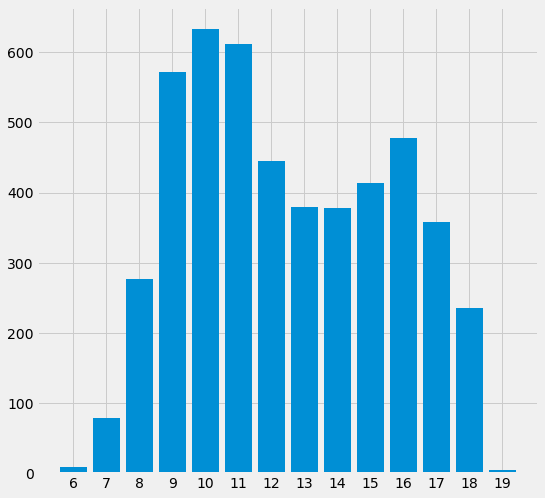

In [62]:
hour = df_hours['Hour']
activity = df_hours['operationCode']

plt.subplots(figsize=(8,8))
plt.bar(hour, activity)
plt.xticks(hour)
plt.show()

In [63]:
df_hours = df_hours.rename(columns={'operationCode': 'Operations'})
df_hours_index = df_hours.set_index(['Hour'])
df_hours_index.to_json('data/hours.json')
df_hours_index

,Operations
Hour,
6,9
7,79
8,277
9,572
10,633
11,612
12,445
13,380
14,378


### Peration=Picking and Warehouse=10

In [64]:
# Filtered by Picking
df_picking = df[df['operationCode'] == 'Picking']

In [65]:
# Filtered by Picking and Warehouse
df_picking_10 = df_picking[df_picking['warehouse'] == '10']
df_picking_10.head()

,Date,warehouse,project,operationCode,employee,Hour
0,Mar 23 2022 7:10PM,10,Amatheon Pharmaceuticals,Picking,Nelson Hurtado,19
1,Mar 23 2022 7:08PM,10,TherapeuticsMD Sample,Picking,Edilberto Souza,19
2,Mar 23 2022 7:07PM,10,TherapeuticsMD Sample,Picking,Edilberto Souza,19
3,Mar 23 2022 7:04PM,10,TherapeuticsMD Sample,Picking,Edilberto Souza,19
4,Mar 23 2022 7:02PM,10,TherapeuticsMD Sample,Picking,Edilberto Souza,19


In [66]:
# Grouped by Employee and Hour
df_picking_10_grouped = df_picking_10.groupby(['employee', 'Hour']).count()[['operationCode']]
df_picking_10_grouped.reset_index(inplace=True)
df_picking_10_grouped.head()

,employee,Hour,operationCode
0,Andre Jocelin,9,23
1,Andre Jocelin,10,14
2,Andre Jocelin,11,15
3,Andre Jocelin,12,11
4,Andre Jocelin,13,21


In [67]:
# Pivot
df_picking_10_pivoted = df_picking_10_grouped.pivot(index='employee', columns='Hour', values='operationCode')
df_picking_10_pivoted = df_picking_10_pivoted.fillna(0)
df_picking_10_pivoted = df_picking_10_pivoted.rename_axis(None, axis=1)
#df_picking_10_pivoted.reset_index(inplace=True)

df_picking_10_pivoted

,8,9,10,11,12,13,14,15,16,17,18,19
employee,,,,,,,,,,,,
Andre Jocelin,0.0,23.0,14.0,15.0,11.0,21.0,20.0,0.0,0.0,15.0,8.0,0.0
Carly Potts,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Djenyson Sanon,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49.0,0.0,0.0,0.0
Edilberto Souza,0.0,6.0,5.0,5.0,4.0,0.0,2.0,0.0,16.0,10.0,18.0,4.0
Frantz Laman,0.0,0.0,0.0,0.0,9.0,13.0,30.0,3.0,0.0,20.0,18.0,0.0
Hugo Gonzales,18.0,24.0,5.0,29.0,34.0,9.0,20.0,3.0,12.0,0.0,0.0,0.0
Jackson Pierre,10.0,25.0,20.0,12.0,0.0,18.0,4.0,0.0,35.0,6.0,0.0,0.0
Jayalakshmi Arcot,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
Liliana Puentes,0.0,2.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [68]:
pickers_W10 = df_picking_10_pivoted.T
pickers_W10.to_json('data/pickers_w10.json')
pickers_W10

employee,Andre Jocelin,Carly Potts,Djenyson Sanon,Edilberto Souza,Frantz Laman,Hugo Gonzales,Jackson Pierre,Jayalakshmi Arcot,Liliana Puentes,Nelson Hurtado,Omar Robles,Rita Geldres,Ronald Celis
8,0.0,0.0,0.0,0.0,0.0,18.0,10.0,0.0,0.0,0.0,0.0,0.0,3.0
9,23.0,2.0,0.0,6.0,0.0,24.0,25.0,0.0,2.0,0.0,0.0,0.0,0.0
10,14.0,0.0,0.0,5.0,0.0,5.0,20.0,0.0,5.0,0.0,0.0,0.0,0.0
11,15.0,0.0,0.0,5.0,0.0,29.0,12.0,0.0,0.0,1.0,0.0,0.0,8.0
12,11.0,0.0,0.0,4.0,9.0,34.0,0.0,0.0,0.0,22.0,0.0,0.0,7.0
13,21.0,0.0,0.0,0.0,13.0,9.0,18.0,0.0,0.0,2.0,1.0,0.0,1.0
14,20.0,0.0,0.0,2.0,30.0,20.0,4.0,1.0,0.0,0.0,0.0,1.0,45.0
15,0.0,0.0,0.0,0.0,3.0,3.0,0.0,0.0,0.0,4.0,0.0,0.0,7.0
16,0.0,0.0,49.0,16.0,0.0,12.0,35.0,0.0,0.0,1.0,0.0,0.0,40.0
17,15.0,0.0,0.0,10.0,20.0,0.0,6.0,0.0,0.0,11.0,0.0,0.0,7.0


In [69]:
df_picking_10_pivoted_T = df_picking_10_pivoted.T
df_picking_10_pivoted_T

employee,Andre Jocelin,Carly Potts,Djenyson Sanon,Edilberto Souza,Frantz Laman,Hugo Gonzales,Jackson Pierre,Jayalakshmi Arcot,Liliana Puentes,Nelson Hurtado,Omar Robles,Rita Geldres,Ronald Celis
8,0.0,0.0,0.0,0.0,0.0,18.0,10.0,0.0,0.0,0.0,0.0,0.0,3.0
9,23.0,2.0,0.0,6.0,0.0,24.0,25.0,0.0,2.0,0.0,0.0,0.0,0.0
10,14.0,0.0,0.0,5.0,0.0,5.0,20.0,0.0,5.0,0.0,0.0,0.0,0.0
11,15.0,0.0,0.0,5.0,0.0,29.0,12.0,0.0,0.0,1.0,0.0,0.0,8.0
12,11.0,0.0,0.0,4.0,9.0,34.0,0.0,0.0,0.0,22.0,0.0,0.0,7.0
13,21.0,0.0,0.0,0.0,13.0,9.0,18.0,0.0,0.0,2.0,1.0,0.0,1.0
14,20.0,0.0,0.0,2.0,30.0,20.0,4.0,1.0,0.0,0.0,0.0,1.0,45.0
15,0.0,0.0,0.0,0.0,3.0,3.0,0.0,0.0,0.0,4.0,0.0,0.0,7.0
16,0.0,0.0,49.0,16.0,0.0,12.0,35.0,0.0,0.0,1.0,0.0,0.0,40.0
17,15.0,0.0,0.0,10.0,20.0,0.0,6.0,0.0,0.0,11.0,0.0,0.0,7.0


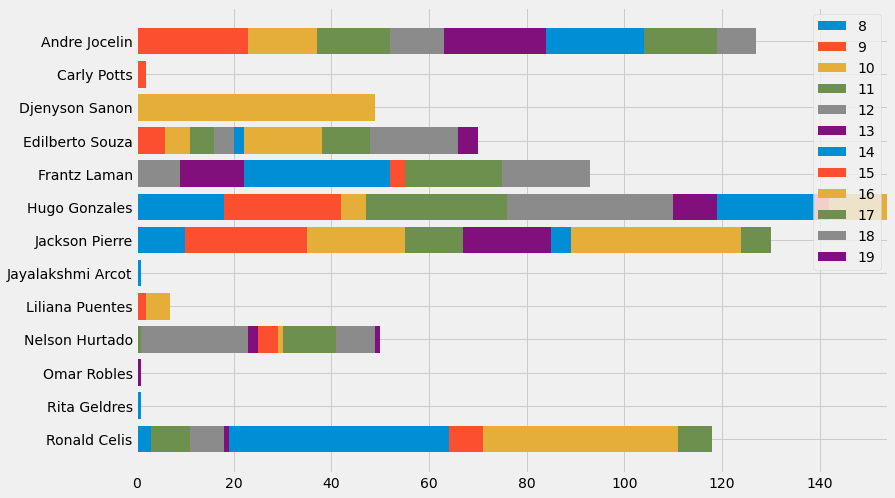

In [70]:
# Horizontal Chart
labels = df_picking_10_pivoted_T.columns
fig, ax = plt.subplots(figsize=(12,8))

left_hour = [0.] * df_picking_10_pivoted_T.shape[1]

for i in df_picking_10_pivoted_T.index:
    ax.barh(labels, df_picking_10_pivoted_T.loc[i].values, left = left_hour)
    left_hour += df_picking_10_pivoted_T.loc[i].values

ax.legend(df_picking_10_pivoted_T.index)
plt.gca().invert_yaxis()
plt.show()

In [71]:
df_picking_10_pivoted_T.index

Int64Index([8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19], dtype='int64')

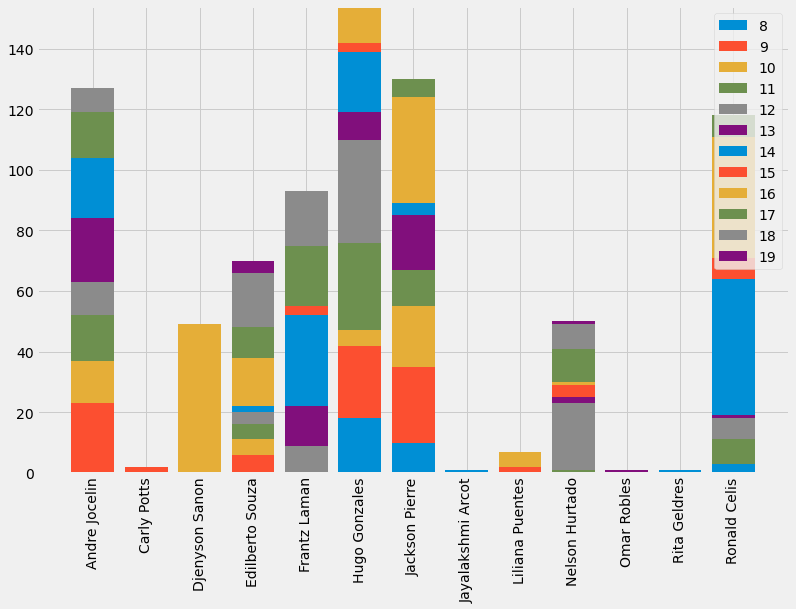

In [72]:
# Vertical Chart
labels = df_picking_10_pivoted_T.columns
fig, ax = plt.subplots(figsize=(12,8))

bottom_hour = [0.] * df_picking_10_pivoted_T.shape[1]

for i in df_picking_10_pivoted_T.index:
    ax.bar(labels, df_picking_10_pivoted_T.loc[i].values, bottom = bottom_hour)
    bottom_hour += df_picking_10_pivoted_T.loc[i].values

ax.legend(df_picking_10_pivoted_T.index)

plt.xticks(rotation=90)
plt.show()